In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, linregress

df = pd.read_csv("analysis_results.csv") # data read

In [2]:
df[['s', 'comparison']] = df['s'].str.extract(r'([\d.]+),\s*(.*)') # s val & category (0 vs. 1, 0 vs. 2)
df['s'] = df['s'].astype(float)

df_melted = df.melt( # parsing
    id_vars=["s", "comparison"],
    value_vars=["Cohen's d (a)", "Cohen's d (b)", "Cohen's d (c)", "Cohen's d (d)"],
    var_name="model",
    value_name="cohen_d"
)
df_melted['|d|'] = df_melted['cohen_d'].abs()  # take absolute value of decoherence

In [3]:
results = []

for model in df_melted['model'].unique():
    for comp in ["0 vs. 1", "0 vs. 2"]:
        subset = df_melted[(df_melted['model'] == model) & (df_melted['comparison'] == comp)]
        if len(subset) >= 3:
            x = subset['s']
            y = subset['|d|']

            rho, p_rho = spearmanr(x, y) # spearman fn., shows trend of a monotonic fn. (not necessarily linear)

            slope, intercept, r_val, p_lin, _ = linregress(x, y) # lin. reg. fn., how much a correlation is clear
            r_squared = r_val**2

            # C_score = |Spearman ρ| × R²
            r_score = abs(rho) * r_squared # Stochastic Response Score - multiplying spearman, which gives consistency, and R^2, which gives correlation

            results.append({
                "model": model,
                "comparison": comp,
                "Spearman ρ": round(rho, 3),
                "Spearman p": round(p_rho, 4),
                "R²": round(r_squared, 3),
                "r_score": round(r_score, 3)
            })

results_df = pd.DataFrame(results)

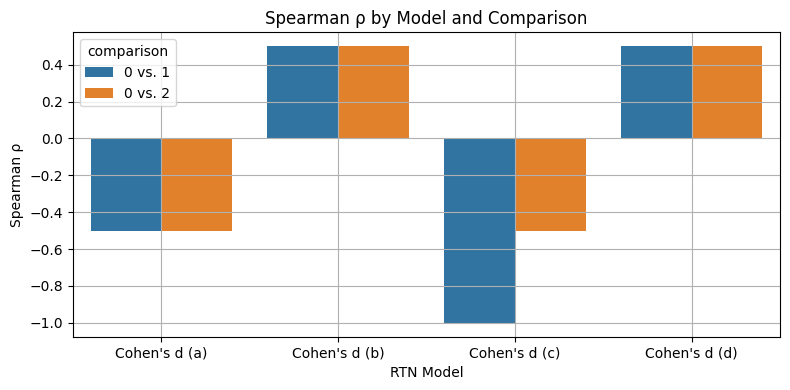

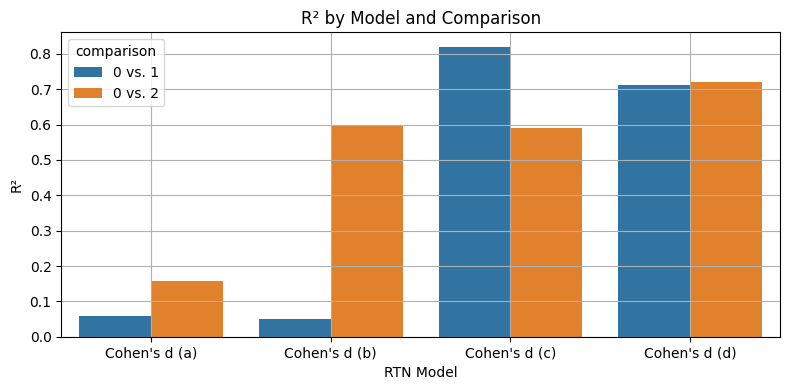

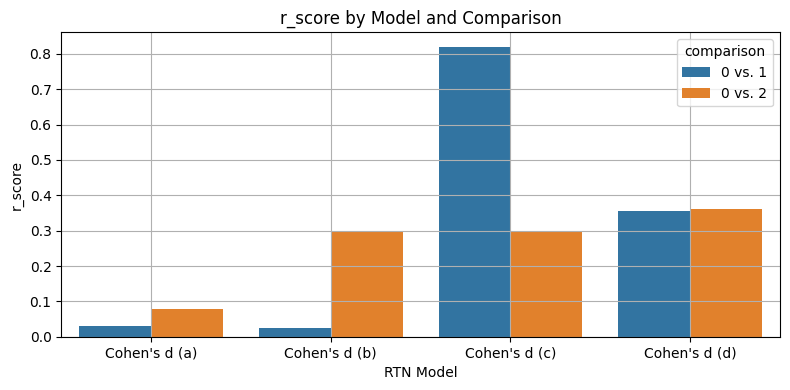

Final Data/Stats
        model comparison  Spearman ρ  Spearman p    R²  r_score
Cohen's d (a)    0 vs. 1        -0.5      0.6667 0.058    0.029
Cohen's d (a)    0 vs. 2        -0.5      0.6667 0.158    0.079
Cohen's d (b)    0 vs. 1         0.5      0.6667 0.051    0.025
Cohen's d (b)    0 vs. 2         0.5      0.6667 0.599    0.300
Cohen's d (c)    0 vs. 1        -1.0      0.0000 0.820    0.820
Cohen's d (c)    0 vs. 2        -0.5      0.6667 0.590    0.295
Cohen's d (d)    0 vs. 1         0.5      0.6667 0.711    0.355
Cohen's d (d)    0 vs. 2         0.5      0.6667 0.720    0.360


In [4]:
metrics = ["Spearman ρ", "R²", "r_score"]
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=results_df, x="model", y=metric, hue="comparison")
    plt.title(f"{metric} by Model and Comparison")
    plt.ylabel(metric)
    plt.xlabel("RTN Model")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


print("Final Data/Stats")
print(results_df.to_string(index=False))
results_df.to_csv("decoherence_r_score_summary.csv", index=False)